In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:

data_dir = "/Users/rinagoldberg/Github/group6-project/"

csv = data_dir + "Hakai KC Buoy (Water Temperature).csv"
df_Hakai = pd.read_csv(csv)


csv = data_dir + "Queen Charlotte Sound (pH).csv"
df_QCS = pd.read_csv(csv)
df_QCS_Cleaned = df_QCS.loc[df_QCS["pH_T_measured"]>0,:]

csv = data_dir + "Seattle Aquarium (pH).csv"
df_SA_pH = pd.read_csv(csv)
df_SA_pH_Cleaned = df_SA_pH.loc[df_SA_pH["pH"]<=10,:]


csv = data_dir + "Seattle Aquarium (Water Temperature).csv"
df_SA_WT = pd.read_csv(csv)
df_SA_WT_Cleaned = df_SA_WT.loc[df_SA_WT["Water Temp"]<=100,:]

Text(0, 0.5, 'Water Temperature')

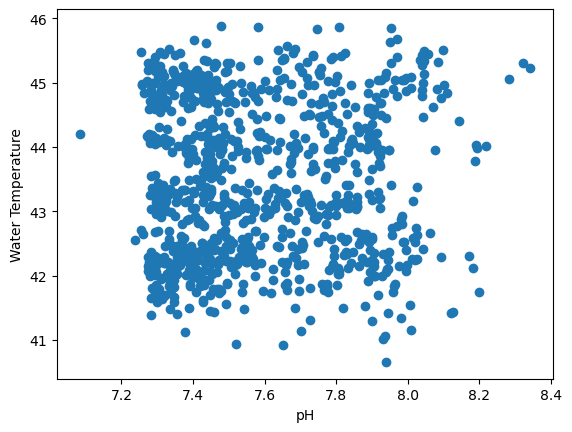

In [13]:
combined_QCSHakai_df = pd.concat([df_Hakai, df_QCS_Cleaned], axis = 1)

figure, ax = plt.subplots()
ax.scatter(combined_QCSHakai_df['pH_T_measured'], combined_QCSHakai_df['Water Temp'])
ax.set_xlabel('pH') 
ax.set_ylabel('Water Temperature')

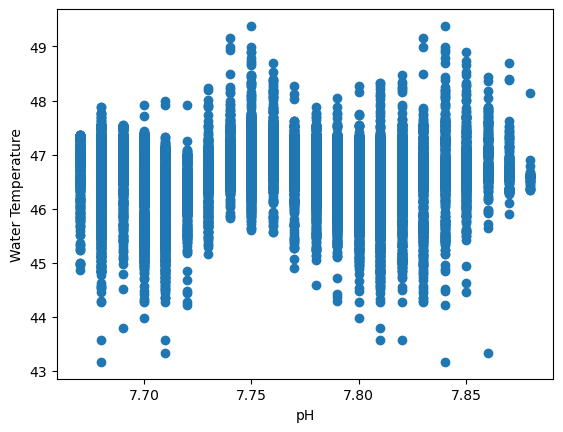

In [14]:
combined_Seattle_df = pd.merge(left=df_SA_pH_Cleaned, right=df_SA_WT_Cleaned, how='left', left_on='Date and Time', right_on='Date and Time')

figure, ax = plt.subplots()
ax.scatter(combined_Seattle_df['pH'], combined_Seattle_df['Water Temp'])
ax.set_xlabel('pH') 
ax.set_ylabel('Water Temperature')
plt.show()

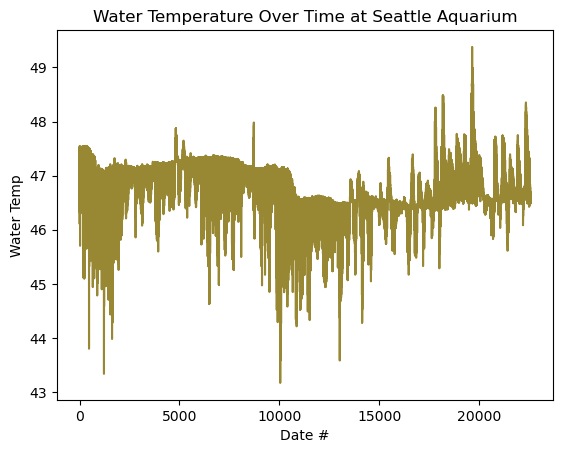

In [15]:
counting_list = []

for each in range (0,22568):
    counting_list.append(each)

combined_Seattle_df['Date #'] = counting_list
figure, ax = plt.subplots()
ax.plot(combined_Seattle_df['Date #'], combined_Seattle_df['Water Temp'], color='#983') # a dark charcoal
ax.set_xlabel('Date #')
ax.set_ylabel('Water Temp')
ax.set_title('Water Temperature Over Time at Seattle Aquarium')
plt.show()

# ARIMA for pH and water temp over time (possibly test for stationarity)
# maybe take an average for each day instead of comparing thousands of data points
# seasonal decomposition
# correlation and linear regression for pH vs. water temp (more important)!

In [54]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(combined_Seattle_df['pH'], order=(1,1,1)).fit()

print(model1.summary())


                               SARIMAX Results                                
Dep. Variable:                     pH   No. Observations:                22568
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28128.515
Date:                Mon, 01 May 2023   AIC                         -56251.029
Time:                        17:12:13   BIC                         -56226.957
Sample:                             0   HQIC                        -56243.199
                              - 22568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.066e-09   7.79e-15   3.94e+05      0.000    3.07e-09    3.07e-09
ma.L1       3.044e-09   1.11e-14   2.73e+05      0.000    3.04e-09    3.04e-09
sigma2         0.0048   5.75e-05     84.112      0.0

In [55]:
model2 = ARIMA(combined_Seattle_df['Water Temp'], order=(1,1,1)).fit()

print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:             Water Temp   No. Observations:                22568
Model:                 ARIMA(1, 1, 1)   Log Likelihood               13516.377
Date:                Mon, 01 May 2023   AIC                         -27026.754
Time:                        17:12:17   BIC                         -27002.681
Sample:                             0   HQIC                        -27018.924
                              - 22568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9855      0.001  -1269.940      0.000      -0.987      -0.984
ma.L1         -0.0060      0.022     -0.272      0.786      -0.049       0.037
sigma2         0.0177   3.01e-05    586.948      0.0

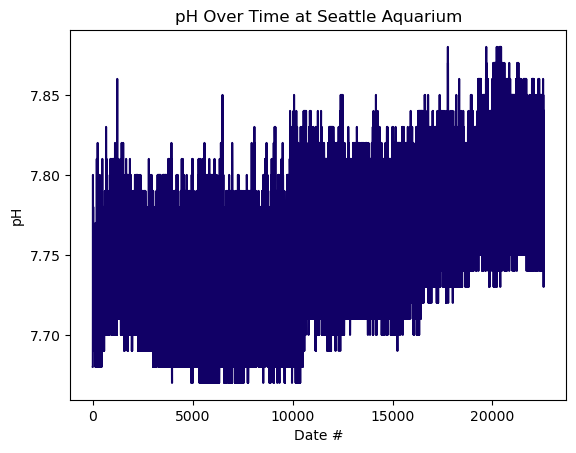

In [16]:
figure, ax = plt.subplots()
ax.plot(combined_Seattle_df['Date #'], combined_Seattle_df['pH'], color='#106') # a dark charcoal
ax.set_xlabel('Date #')
ax.set_ylabel('pH')
ax.set_title('pH Over Time at Seattle Aquarium')
plt.show()

For our hypothesis test, we will test:

1. Can one variable be used to predict another?
2. Does a value increase, decrease, or stay the same over time?